¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Proyecto Integrado

### Introducción

*Ice* es una tienda online de videojuegos. La data que tenemos contempla datos históricos sobre las ventas de estos videojuegos. Se espera identificar patrones que determinen si un videojuego es exitoso, con el fin de planificar campañas publicitarias para el 2017.

### Descripción de Datos.

— Name (Nombre): Nombre de cada videojuego.

— Platform (Plataforma): Plataforma en la que se ejecuta el videojuego.

— Year_of_Release (Año de lanzamiento): Año en que se lanzó a la venta cada videojuego.

— Genre (Género): Categoría que asigna el género al que pertenece cada videojuego.

— NA_sales: Ventas en Norteamérica en millones de dólares estadounidenses.

— EU_sales: Ventas en Europa en millones de dólares estadounidenses.

— JP_sales: Ventas en Japón en millones de dólares estadounidenses.

— Other_sales: Ventas en otros países en millones de dólares estadounidenses.

— Critic_Score: Puntaje que se le asigna a un juego mediante la valorización por la crítica (máximo de 100). 

— User_Score: Puntaje asignado por los usuarios de videojuegos (máximo de 10). 

— Rating (ESRB): Clasificación de edad que asigna el Entertainment Software Rating Board tras evaluar el contenido de cada videojuego.

### Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#### Cargar datos

In [2]:
games_df = pd.read_csv('/datasets/games.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

#### Preparar los datos

In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# Rating: categoría según el contenido del videojuego; clasifica en adulto, adolescente, etc
games_df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [6]:
# Diferentes plataformas de la data. Tenemos 31 plataformas.
games_df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
# Convertir los nombres de las columnas en minúsculas
games_df.columns = games_df.columns.str.lower()

In [8]:
# Duplicados explícitos
games_df.duplicated().sum()

0

##### Valores ausentes

In [9]:
null_data = games_df.isna().sum()
print(f'Los valores ausentes son: \n\n{null_data}')

Los valores ausentes son: 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [10]:
games_df[games_df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
games_df['name'].fillna('unknown', inplace=True)

In [12]:
games_df['genre'].fillna('unknown', inplace=True)

Tenemos sólo 2 valores ausentes en la columna *"name"* y *"genre"* que se cambiaron a "desconocido".


In [13]:
games_df['year_of_release'].fillna(0, inplace=True)

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información recaba mediante una investigación. Es muy común que cuando trabajamos con datos en la vida real, mucho de estos vengan con valores nulos que en ocasiones tendremos que completar con proxys
</div>

*Valores ausentes en 'year of release'*  
Probablemente no se tiene registro del año de lanzamiento de estos videojuegos debido a que no se registran mayores ventas en comparación con aquellos de los que sí se tiene el registro, de modo que no fueron juegos tan populares.  
Posiblemente se da una situación similar con los valores ausentes en *'critic score'*, *'user score'* y *'rating'*  
En *'year of release'* los valores ausentes fueron reemplazados por 0 ya que se desconoce el año de lanzamiento, y con este valor posteriormente se sabrá identificar que corresponde a los juegos de los que no se contempla un lanzamiento determinado.

In [14]:
# Hallar los promedios para 'critic score' según los videojuegos agrupados por género al que pertenecen
critic_score_avg = games_df.groupby('genre')['critic_score'].mean()
critic_score_avg.fillna(0, inplace=True)
critic_score_avg

genre
Action          66.629101
Adventure       65.331269
Fighting        69.217604
Misc            66.619503
Platform        68.058350
Puzzle          67.424107
Racing          67.963612
Role-Playing    72.652646
Shooter         70.181144
Simulation      68.619318
Sports          71.968174
Strategy        72.086093
unknown          0.000000
Name: critic_score, dtype: float64

In [15]:
# Llenar los valores nulos en 'critic_score' con los promedios de cada género
games_df['critic_score'] = games_df.apply(
    lambda row: critic_score_avg[row['genre']] 
    if np.isnan(row['critic_score']) 
    else row['critic_score'], 
    axis=1
    )

*Valores ausentes en 'critic score'*  
Se reemplazaron estos valores con el promedio de critica del género al que pertene cada videojuego, este promedio con el fin de no afectar significativamente los datos, pues de reemplazarse con 0 -pensando en que no tienen puntuación- afectaría los datos estadísticos.

In [16]:
# Dejar los valores 'tbd' como valores ausentes, ya que son de diferentes categorías, y lo más cercano sería dejarlos como 
#ausente o con el promedio según el análisis posterior
games_df['user_score'].replace('tbd', np.nan, inplace=True)
games_df['user_score'] = games_df['user_score'].astype('float')

*'TBD'*  
En la columna 'user score' teníamos el valor 'tbd' (to be determined), sin embargo mantener este valor no permite cambiar el tipo de datos de esta columna de *object* a -> *float* para poder realizar cálculos con estos números, de modo que 'tbd' se reemplazó y dejó como 'valor ausente'. Así, se logra también cambiar el tipo de dato de esta columna a float para poder calcular datos estadísticos con los valores de 'user score'.

In [17]:
user_score_avg = games_df.groupby('genre')['user_score'].mean()
user_score_avg

genre
Action          7.054044
Adventure       7.133000
Fighting        7.302506
Misc            6.819362
Platform        7.301402
Puzzle          7.175000
Racing          7.036193
Role-Playing    7.619515
Shooter         7.041883
Simulation      7.134593
Sports          6.961197
Strategy        7.295177
unknown              NaN
Name: user_score, dtype: float64

In [18]:
# Llenar los valores nulos en 'user_score' con los promedios de cada género
games_df['user_score'] = games_df.apply(
    lambda row: user_score_avg[row['genre']] 
    if np.isnan(row['user_score']) 
    else row['user_score'], 
    axis=1
    )

*Valores ausentes en 'user score'*  
Este valor también fue reemplazado con el promedio correspondiente a cada género de videojuego, pensando en que es más cercano el promedio según categoría generica a la que pertenece cada videojuego, en lugar de la plataforma en la que se ejecuta.

In [19]:
games_df['rating'].fillna('unknown', inplace=True)

*Valores ausentes en 'rating'*  
Estos valores se reemplazaron con "unknown" pues no se puede determinar a que clasificación pertenecen.

##### Convertir los datos

In [20]:
# Cambiar el tipo de datos de la columna 'year of release'
games_df['year_of_release'] = games_df['year_of_release'].astype(int)

Se cambió el tipo de datos de la columna 'year of release' de tipo *float* a *int* ya que los años contemplan números enteros y no se perdían datos al realizar el cambio.

In [21]:
# Calcular ventas totales para cada videojuego en una nueva columna
games_df['total_sales'] = games_df[['jp_sales', 'na_sales', 'eu_sales', 'other_sales']].sum(axis=1)

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

In [22]:
# 5 Juegos con mayores ventas totales
top_5_games = games_df.nlargest(5, ['total_sales'])
top_5_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.058350,7.301402,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.619515,unknown,31.38


### Análisis de los Datos

##### Juegos lanzados en diferentes años

In [23]:
games_for_year = games_df.groupby('year_of_release')['name'].count()

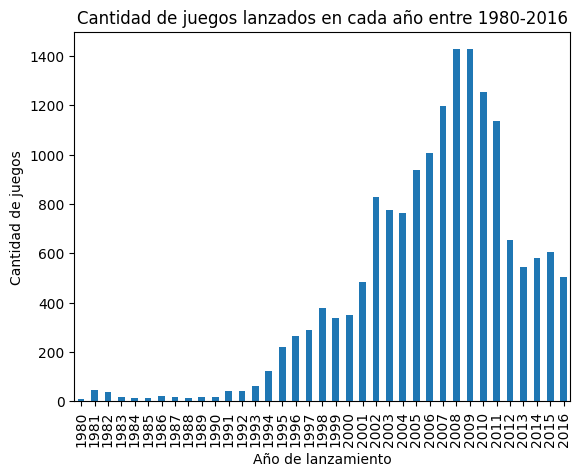

In [24]:
# Cantidad de juegos lanzados en diferentes años, son significativos los datos de cada período?
games_for_year.loc[1980:2016].plot(
    kind= 'bar', 
    xlabel= 'Año de lanzamiento',
    ylabel= 'Cantidad de juegos',
    title= 'Cantidad de juegos lanzados en cada año entre 1980-2016'
    )
plt.show()

El peak de mayor cantidad de juegos lanzados por año se dió en 2008-2009 disminuyendo drásticamente en el 2011. 
El período de tiempo con mayor popularidad de lanzamientos de videojuegos se da entre 2007 y 2011, logrando posteriormente en 2016, valores similares a lo que se dió en 2001.

##### Variación de ventas entre diferentes plataformas

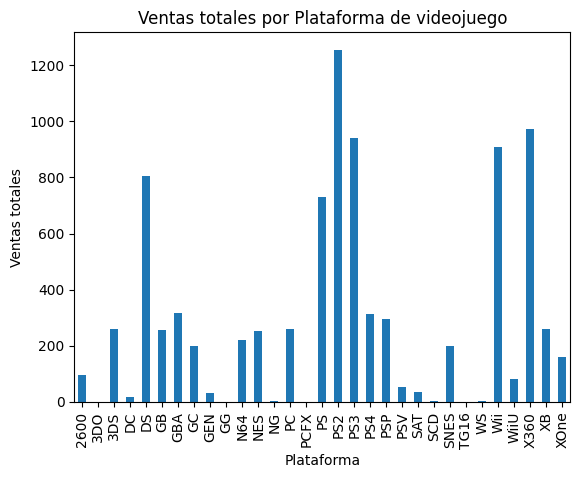

In [25]:
# Variación de ventas de una plataforma a otra.
sales_platform = games_df.groupby('platform')['total_sales'].sum()
sales_platform.plot(
    kind= 'bar',
    xlabel= 'Plataforma',
    ylabel= 'Ventas totales',
    title= 'Ventas totales por Plataforma de videojuego'
)
plt.show()

In [26]:
# Ventas totales según plataforma y año
sales_platform_by_year = games_df.pivot_table(index= 'year_of_release',
                                              columns= 'platform',
                                              values= 'total_sales',
                                              aggfunc= sum)
sales_platform_by_year

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
0,10.50,NaN,1.19,NaN,3.34,1.03,4.97,2.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.33,NaN,10.18,6.17,NaN
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


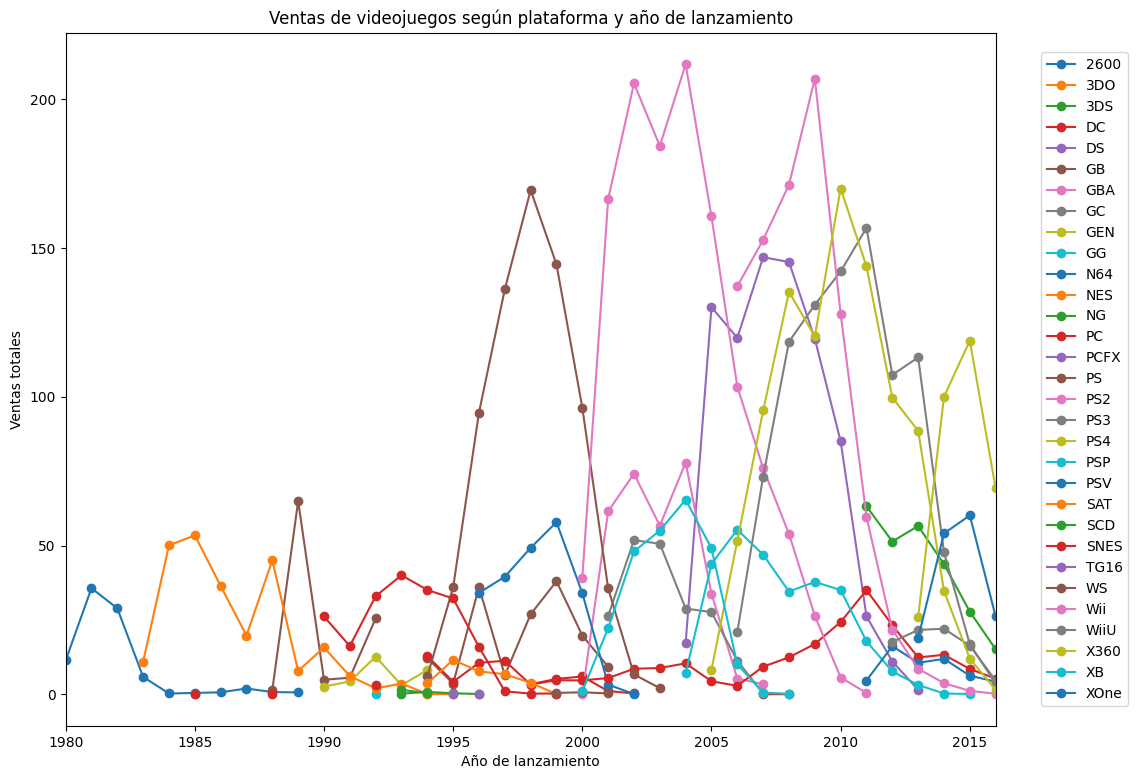

In [27]:
# Variación de ventas anual entre una plataforma y otra
sales_platform_by_year.plot(
    title= 'Ventas de videojuegos según plataforma y año de lanzamiento',
    xlabel= 'Año de lanzamiento',
    ylabel= 'Ventas totales',
    style= 'o-',
    figsize= [12, 9],
    xlim= [1980, 2016]
)
plt.legend(bbox_to_anchor=(1.15, 0.5), loc= 'right')
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

Elegir plataformas con mayores ventas totales y construir distribución basada en los datos de cada año.
Buscar las plataformas que solían ser populares y que ahora no tienen ventas. Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [28]:
# Buscar las plataformas con mayores ventas totales
platform_top = games_df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending=False)
platform_top.head(10)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [29]:
platform_top['z_score'] = (platform_top['total_sales'] - platform_top['total_sales'].mean()) / platform_top['total_sales'].std()
platform_top['color'] = ['red' if score <= 0 else 'green' for score in platform_top['z_score']]

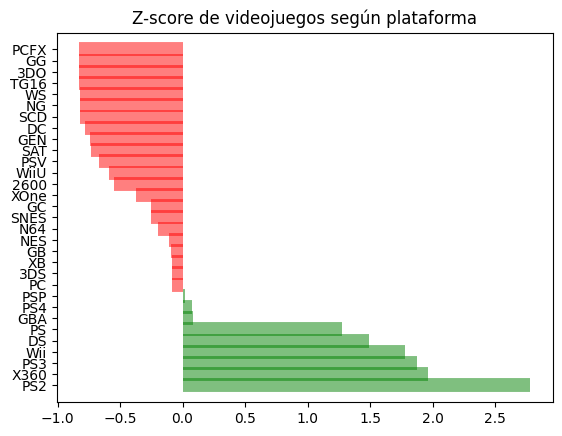

In [30]:
# Buscar las plataformas más rentables
plt.hlines(
    y= platform_top.platform,
    xmin= 0,
    xmax= platform_top.z_score,
    colors= platform_top.color,
    linewidth= 10,
    alpha= 0.5
)
plt.title('Z-score de videojuegos según plataforma')
plt.show()

In [31]:
platform_top_sales = platform_top['platform'].head(10)
platform_top_sales

16     PS2
28    X360
17     PS3
26     Wii
4       DS
15      PS
6      GBA
18     PS4
19     PSP
13      PC
Name: platform, dtype: object

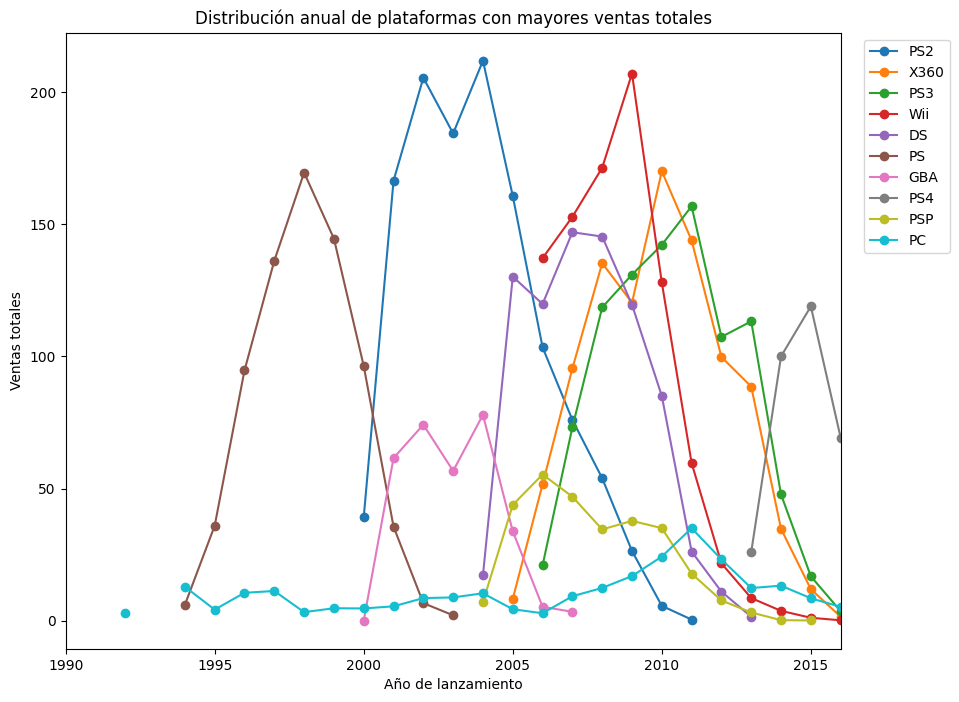

In [32]:
# Distribución anual de Plataformas con mayores ventas totales
sales_platform_by_year[platform_top_sales].plot(
    title= 'Distribución anual de plataformas con mayores ventas totales',
    xlabel= 'Año de lanzamiento',
    ylabel= 'Ventas totales',
    style= 'o-',
    figsize= [10, 8],
    xlim= [1990, 2016]
)
plt.legend(bbox_to_anchor=(1.15, 1), loc= 'upper right')
plt.show()

* Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?  
Considerando las ventas por año de las diferentes plataformas; las nuevas comienzan a aparecer al cabo de 1-2 años desde que surgió la anterior y empiezan a hacerse populares entre el 3er y 5to año desde su inicio alcanzando su peak, posteriormente sus ventas van decreciendo y terminan desapareciendo al cabo de 8-10 años desde su inicio, así; contemplan aproximadamente una década desde su lanzamiento, peak y desaparición en el mercado. 

##### Datos a considerar para proyectar año 2017

* Determinar para qué período contemplar datos:  
Se pretende obtener datos que permitan generar una campaña para el 2017, de modo que se mirarán datos desde el 2012 contemplando los últimos 5 años de data, donde se obtendrán los juegos y plataformás más reciente para proyectar cómo podría darse el año siguiente en base al comportamiento de los juegos más actuales, teniendo en cuenta que surgen actualizaciones de plataforma y nuevos videojuegos cada vez con menos años entre una nueva y la anterior. 

In [33]:
# Datos a contemplar para el análisis, período 2012-2016
last_5_years = games_df.query('year_of_release >= 2012')
last_5_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,70.181144,7.041883,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,72.652646,7.619515,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.000000,5.300000,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,65.331269,7.133000,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,66.619503,6.819362,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.629101,7.054044,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,65.331269,7.133000,unknown,0.01


In [34]:
# Ventas anuales según plataforma, de los últimos 5 años (2012-2016)
sales_last_years= last_5_years.groupby(['year_of_release', 'platform']).agg({'total_sales':'sum'}).reset_index()
sales_last_years.head()

,year_of_release,platform,total_sales
0,2012,3DS,51.36
1,2012,DS,11.01
2,2012,PC,23.22
3,2012,PS3,107.36
4,2012,PSP,7.69


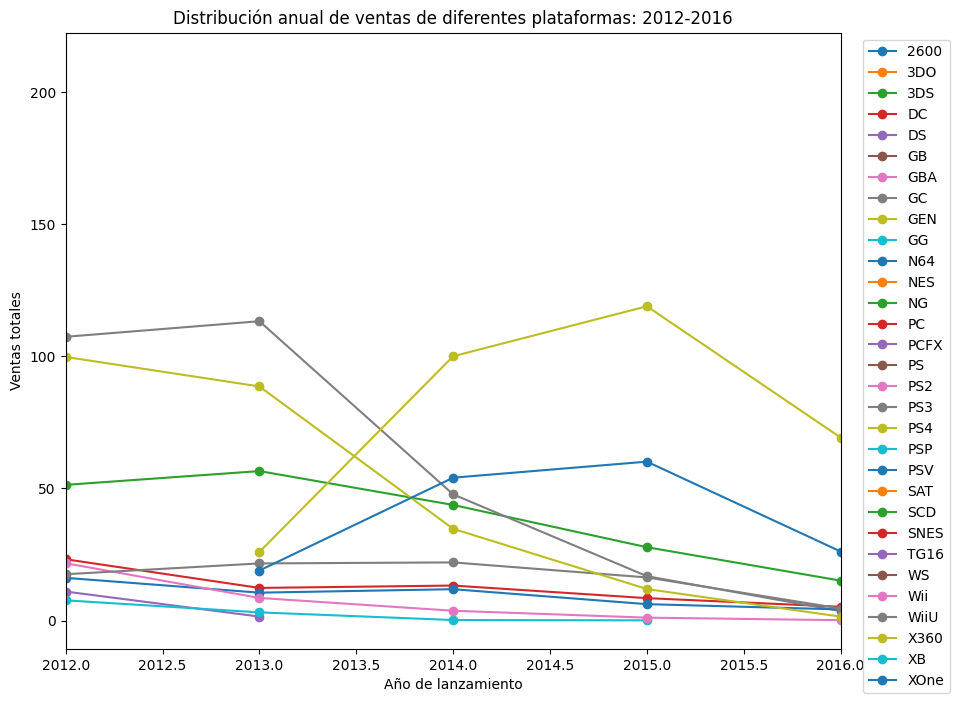

In [35]:
# Observar plataformas potencialmente rentables, en base a la distribución de ventas
sales_platform_by_year.plot(
    title= 'Distribución anual de ventas de diferentes plataformas: 2012-2016',
    xlabel= 'Año de lanzamiento',
    ylabel= 'Ventas totales',
    style= 'o-',
    figsize= [10, 8],
    xlim= [2012, 2016]
)
plt.legend(bbox_to_anchor=(1.15, 1), loc= 'upper right')
plt.show()

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?  
Elige varias plataformas potencialmente rentables:  
 - *PS3* decrece a medida que aumentan las ventas de *PS4* hacia el 2014, también en el mismo año decrece *X360* pero aumentan las ventas de *XOne*. Para *Wii* también comienza a decrecer cuando surge *WiiU*, aunque la diferencia es menos significativa en comparación al fenómeno que se da con *PS3 y PS4*, y para *X360 y XOne*. Estas últimas versiones mantienen ventas para el 2016, de modo que podrían ser potencialmente rentables; PS4 y XOne.

In [64]:
# Data de las ventas por plataforma de los últimos 5 años
platform_sales = sales_last_years.pivot_table(index= 'year_of_release',
                             columns= 'platform',
                             values= 'total_sales',
                             aggfunc= sum)

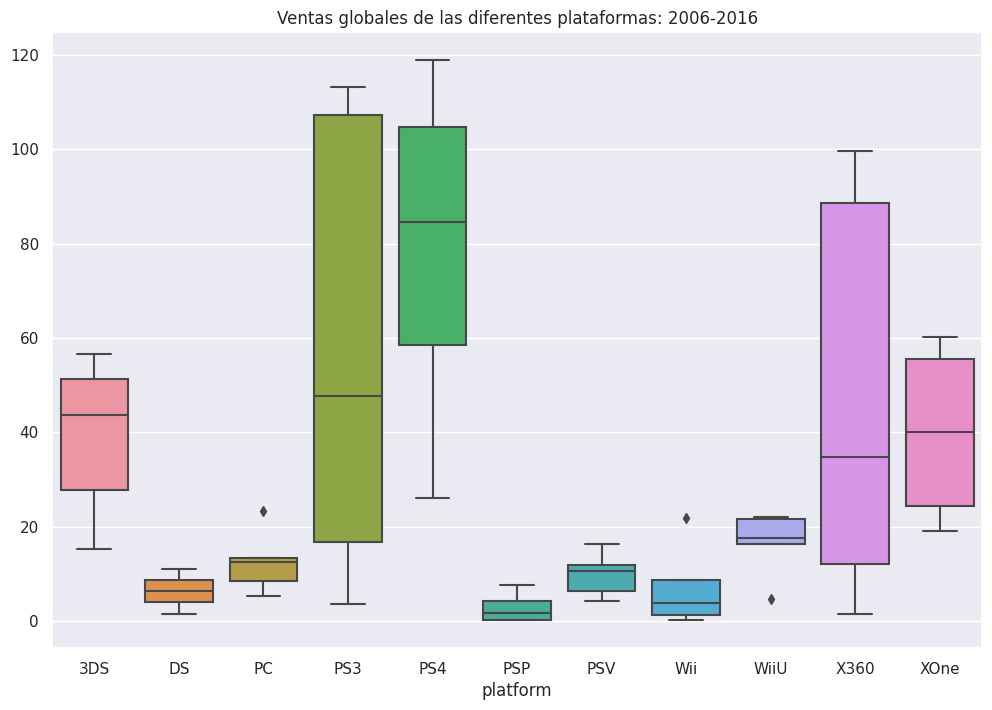

In [65]:
# Crear un diagrama de caja para las ventas globales según plataforma.

sns.set(rc={'figure.figsize': (12,8)})
sns.boxplot(data=platform_sales).set_title('Ventas globales de las diferentes plataformas: 2006-2016')
plt.show()

In [66]:
# Eliminar outliers que pueden sesgar los resultados:

# Hallar Q1, Q3, IQR
Q1 = platform_sales.quantile(0.25)
Q3 = platform_sales.quantile(0.75)

IQR = Q3 - Q1

# outliers
platform_sales[((platform_sales < (Q1 - 1.5 * IQR)) | (platform_sales > (Q3 + 1.5 * IQR))).any(axis=1)]

# data sin outliers
platform_sales_without_outliers = platform_sales[~((platform_sales < (Q1 - 1.5 * IQR)) |(platform_sales > (Q3 + 1.5 * IQR))).any(axis=1)]
platform_sales_without_outliers

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


Text(0.5, 1.0, 'Ventas globales de las diferentes plataformas: 2006-2016')

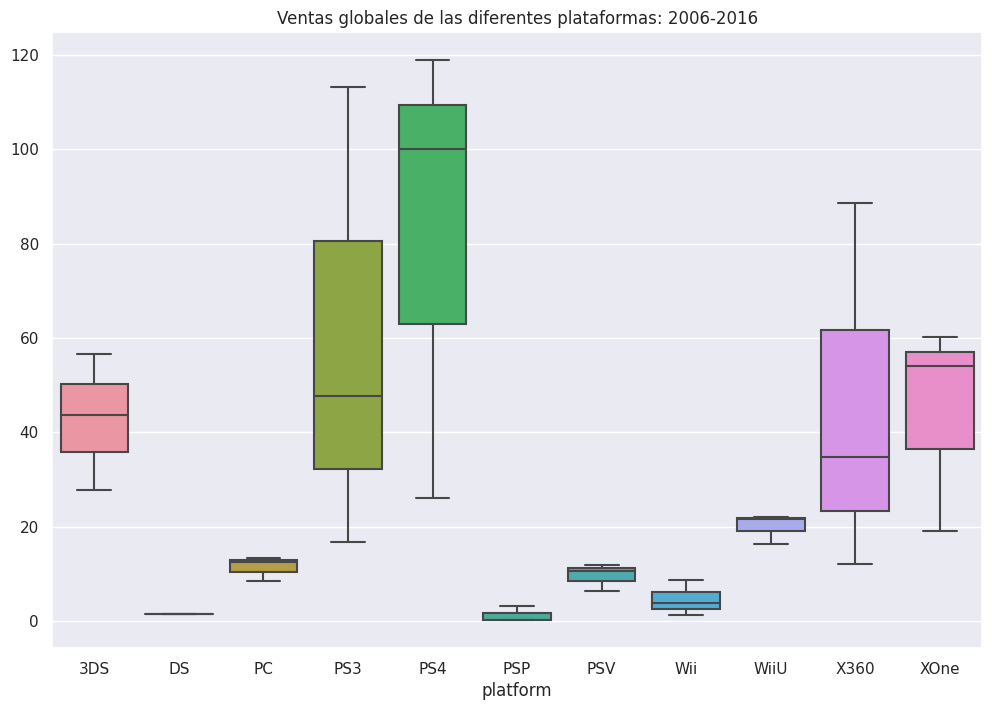

In [69]:
# Diagrama de caja sin valores atípicos
sns.boxplot(data=platform_sales_without_outliers).set_title('Ventas globales de las diferentes plataformas: 2006-2016')

Hay diferencias notoriamente significativas entre las ventas de una plataforma y otra; liderando PS4 con el promedio más alto de ventas ; 100 millones de dólares; superando en 50 millones a su versión anterior PS3. XOne también supera en promedio las ventas de su versión anterior X360 -aunque en menor medida-.  
Por otra parte, también se ven plataformas con promedios muy bajos que no alcanzan los 10 millones.

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>  
    
Gracias por el comentario Tonatiuh; logré notar una gran diferencia en los boxplot, gracias a eliminar los valores atípicos... Modifiqué también la conclusión a partir del diagrama de caja.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

##### Cómo las reseñas pueden afectar las ventas

In [37]:
# Reseñas de usuarios y profesionales vs Ventas de PS4
ps4 = last_5_years.groupby(['platform', 'name'])[['total_sales', 'critic_score', 'user_score']].sum().query('platform == "PS4"').reset_index()
ps4

,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.14,45.000000,5.900000
1,PS4,Adventure Time: Finn & Jake Investigations,0.10,66.629101,7.054044
2,PS4,Aegis of Earth: Protonovus Assault,0.02,57.000000,7.800000
3,PS4,Agatha Christie's The ABC Murders,0.02,67.000000,6.200000
4,PS4,Akiba's Trip: Undead & Undressed,0.11,66.629101,7.054044
...,...,...,...,...,...
387,PS4,Yakuza: Ishin,0.15,66.629101,7.054044
388,PS4,Yoru no Nai Kuni,0.08,72.652646,7.619515
389,PS4,ZombiU,0.06,66.629101,7.054044
390,PS4,Zombie Army Trilogy,0.20,62.000000,6.800000


In [38]:
# Correlación de ventas de PS4 y el puntaje de la crítica
ps4_corr_critic = ps4['total_sales'].corr(ps4['critic_score'])
print('Para la plataforma PS4 la correlación de sus ventas con el puntaje de la crítica es:', ps4_corr_critic)

Para la plataforma PS4 la correlación de sus ventas con el puntaje de la crítica es: 0.35451664088097967


Text(0.5, 1.0, 'Correlación entre ventas totales y puntaje de la crítica para PS4')

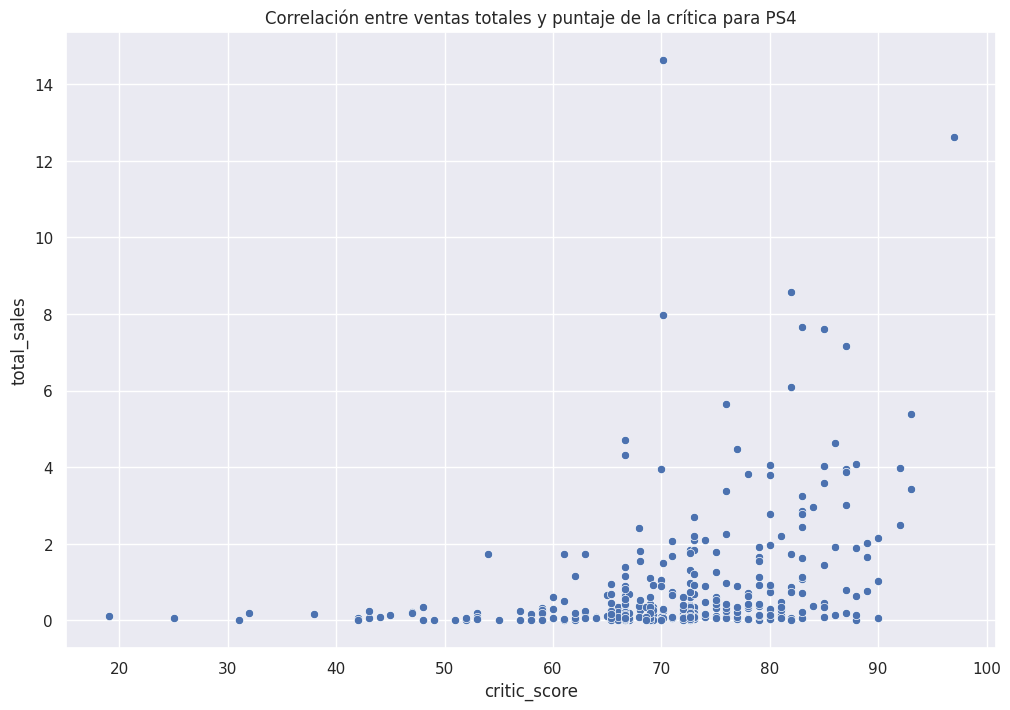

In [39]:
sns.scatterplot(data=ps4, x= 'critic_score', y= 'total_sales').set_title('Correlación entre ventas totales y puntaje de la crítica para PS4')

In [40]:
# Correlación de ventas de PS4 y el puntaje de los usuarios
ps4_corr_user = ps4['total_sales'].corr(ps4['user_score'])
print('Para la plataforma PS4 la correlación de sus ventas con el puntaje de los usuarios es:', ps4_corr_user)

Para la plataforma PS4 la correlación de sus ventas con el puntaje de los usuarios es: -0.05087603661306386


Text(0.5, 1.0, 'Correlación entre ventas totales y puntaje de los usuarios para PS4')

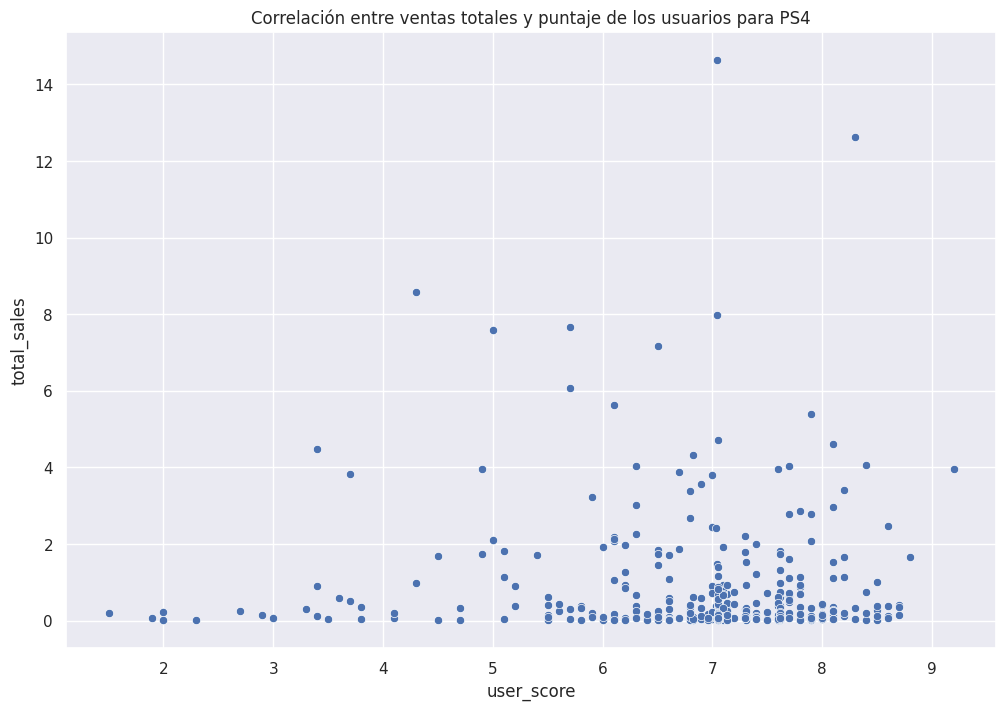

In [41]:
sns.scatterplot(data=ps4, x= 'user_score', y= 'total_sales').set_title('Correlación entre ventas totales y puntaje de los usuarios para PS4')

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

* Se relacionan las ventas con el puntaje de los usuarios y profesionales?  
No necesariamente; pues si bien en los gráficos de correlación podemos ver una tendencia a que se concentran más ventas a medida de que el puntaje es mayor; al calcular la correlación observamos que para el puntaje de la crítica SI se da una correlación positiva, es decir, mientras aumenta el puntaje se generan mayores ventas. Sin embargo, para el cálculo de correlación con el puntaje de los usuarios tenemos más bien una correlación en 0, lo que indica que el puntaje asignado no se relaciona directamente con mayor cantidad de ventas. De modo que las ventas posiblemente se influencian por otros factores, donde pueden participar varios aspectos; si el juego causa entretención, llama la atención, sólo es un nuevo lanzamiento, etc etc.

In [42]:
# Comparar estas correlaciones para otras plataformas
def correlation(platforms):
    data = last_5_years[last_5_years['platform'] == platforms]
    corr = data[['critic_score', 'user_score', 'total_sales']].corr()['total_sales']

    data.plot(y='total_sales', x='critic_score', kind='scatter', grid=True)
    plt.title(platforms)

    data.plot(y='total_sales', x='user_score', kind='scatter', grid=True)
    plt.title(platforms)

    print(platforms, '\n', corr)
    print('----------------')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

PS3 
 critic_score    0.341269
user_score     -0.058114
total_sales     1.000000
Name: total_sales, dtype: float64
----------------
PS4 
 critic_score    0.354517
user_score     -0.050876
total_sales     1.000000
Name: total_sales, dtype: float64
----------------
X360 
 critic_score    0.345897
user_score     -0.022378
total_sales     1.000000
Name: total_sales, dtype: float64
----------------


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

XOne 
 critic_score    0.382426
user_score     -0.088882
total_sales     1.000000
Name: total_sales, dtype: float64
----------------
Wii 
 critic_score    0.292216
user_score      0.008080
total_sales     1.000000
Name: total_sales, dtype: float64
----------------
WiiU 
 critic_score    0.335784
user_score      0.354370
total_sales     1.000000
Name: total_sales, dtype: float64
----------------


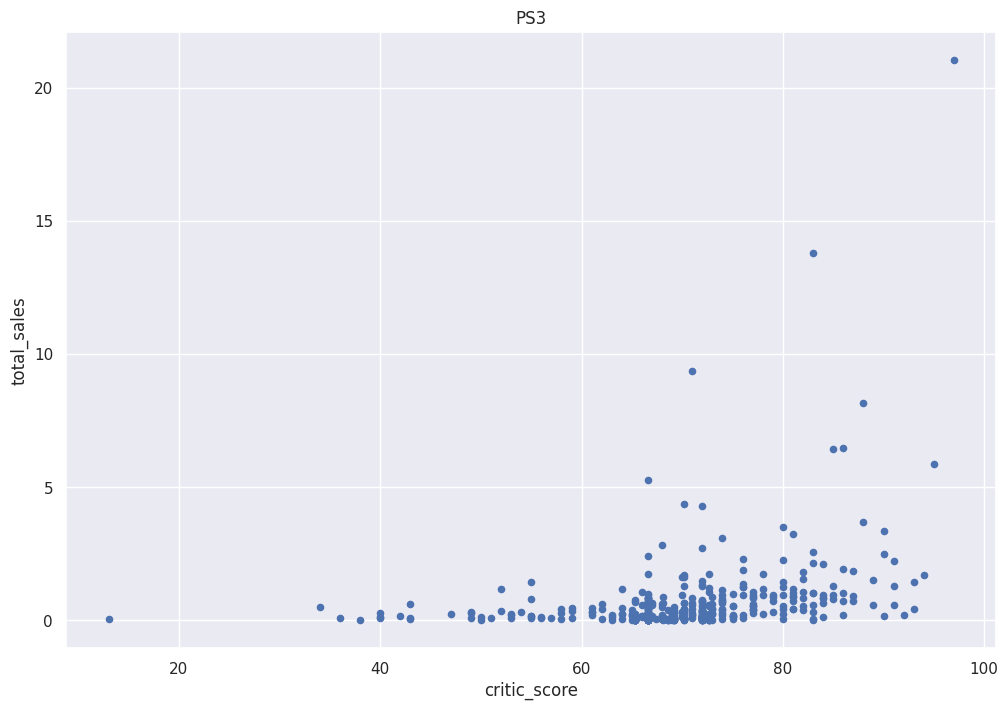

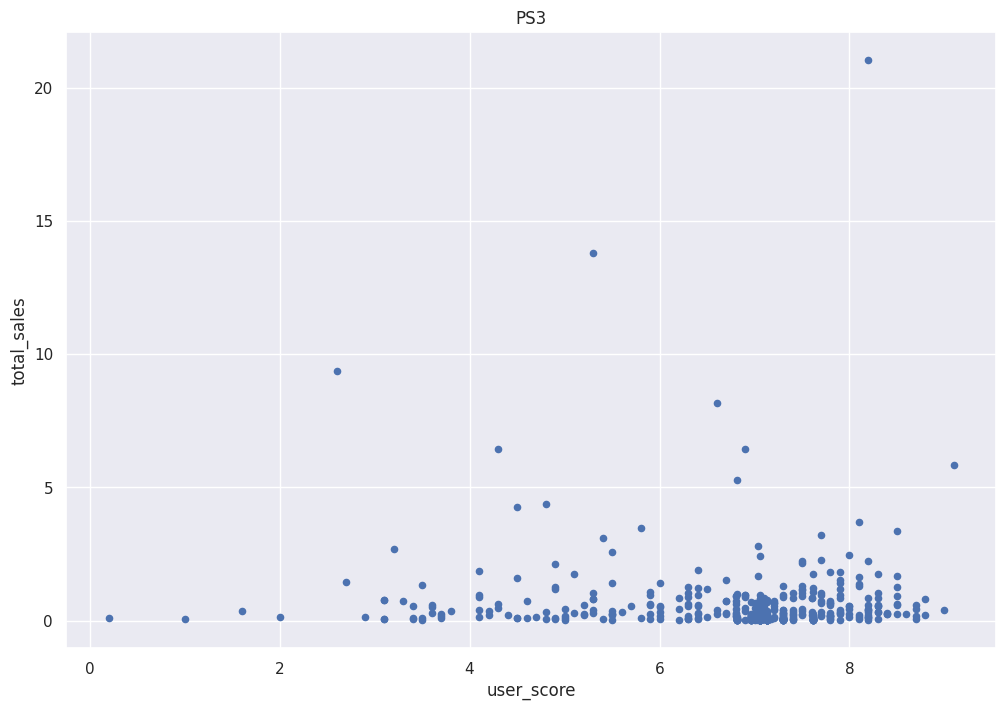

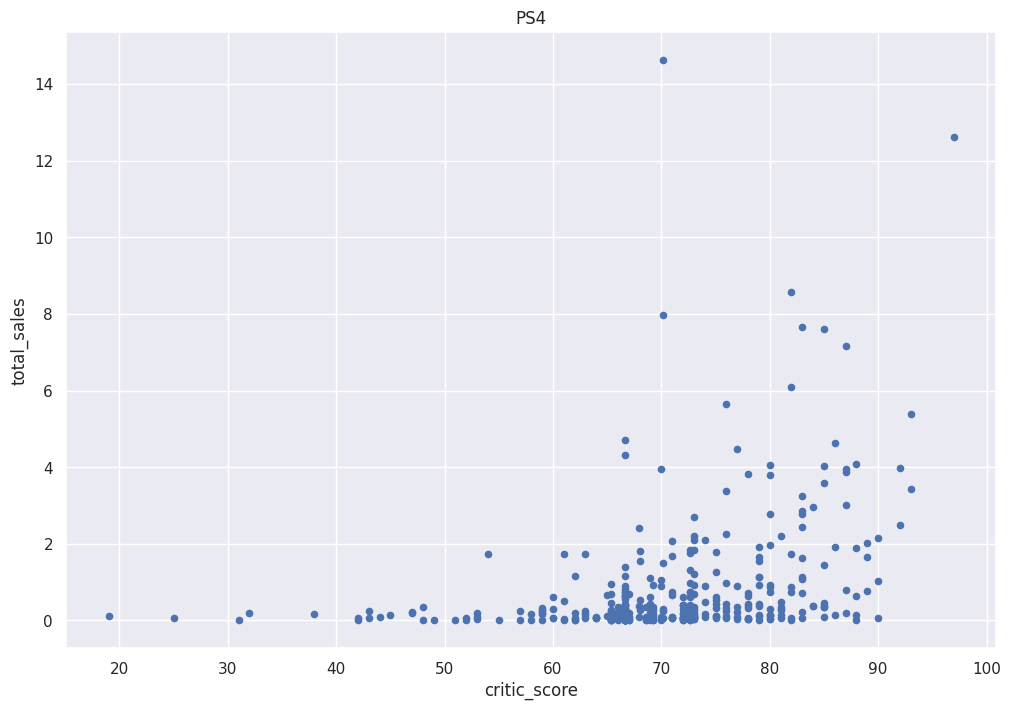

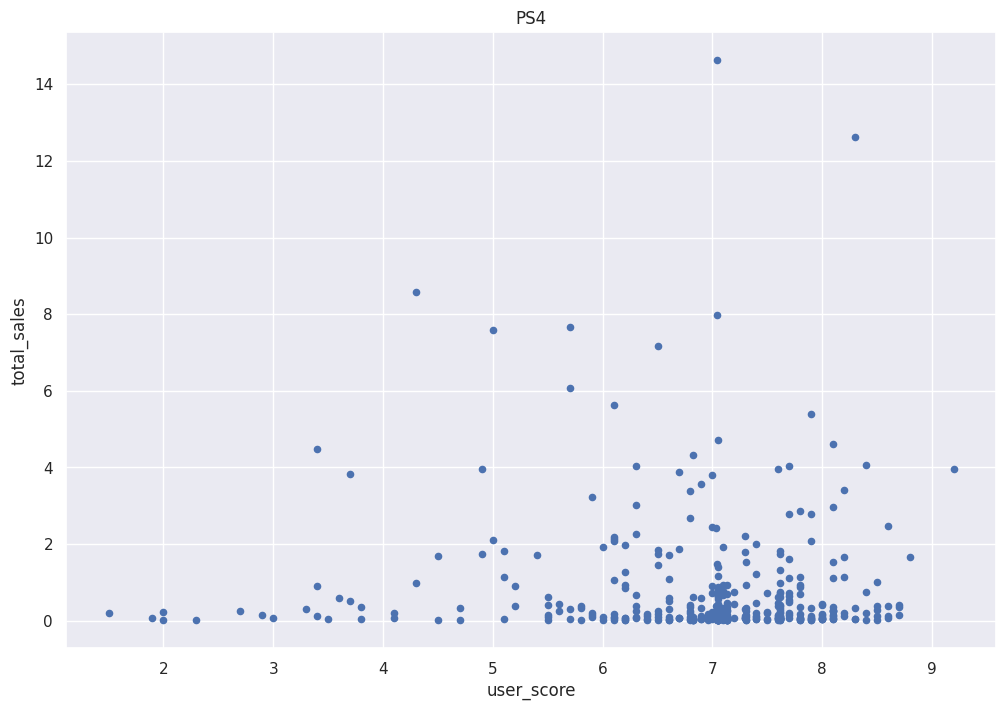

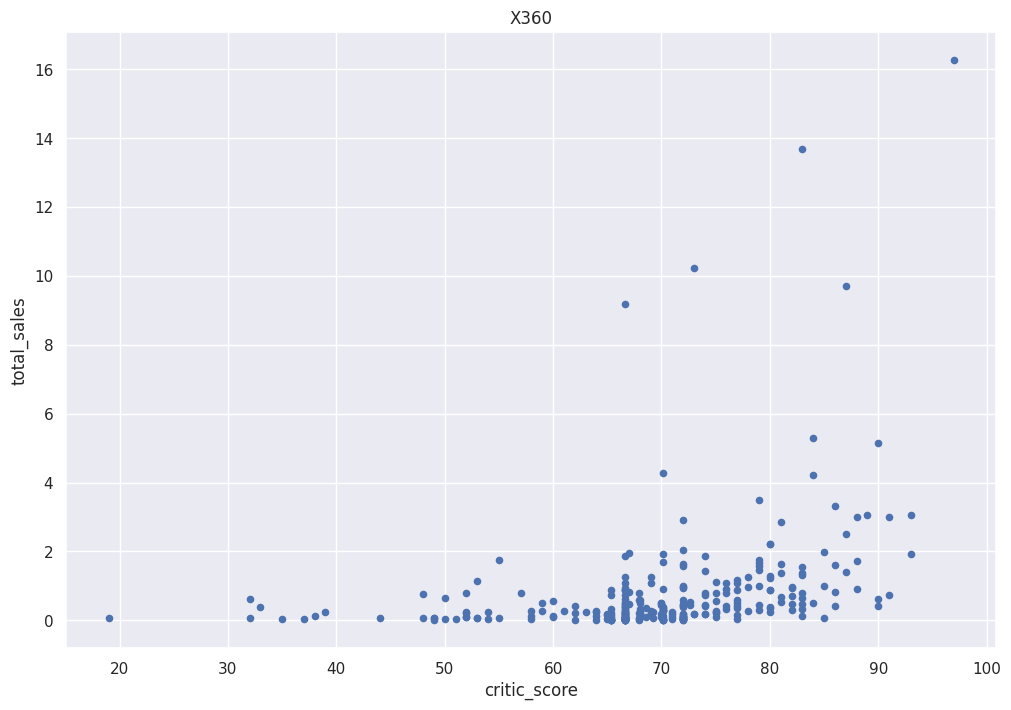

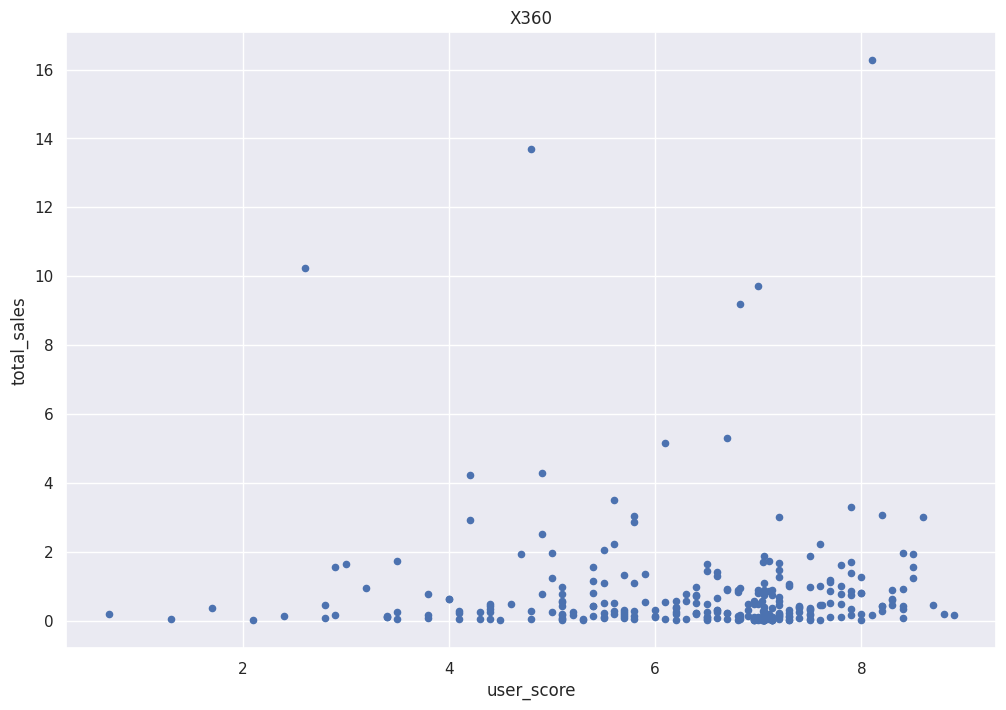

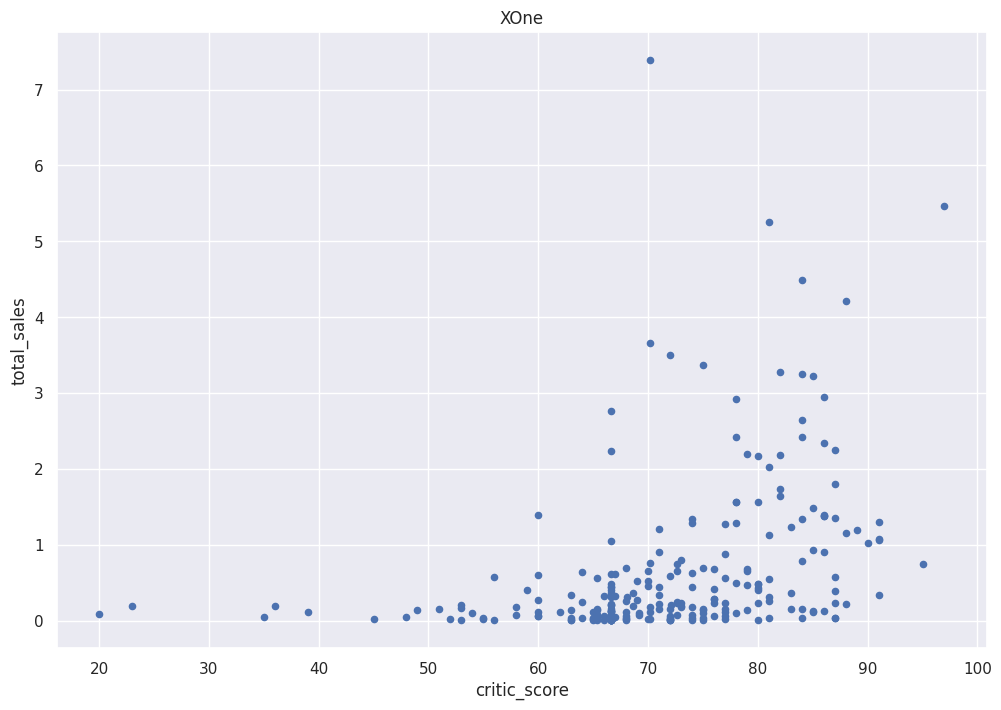

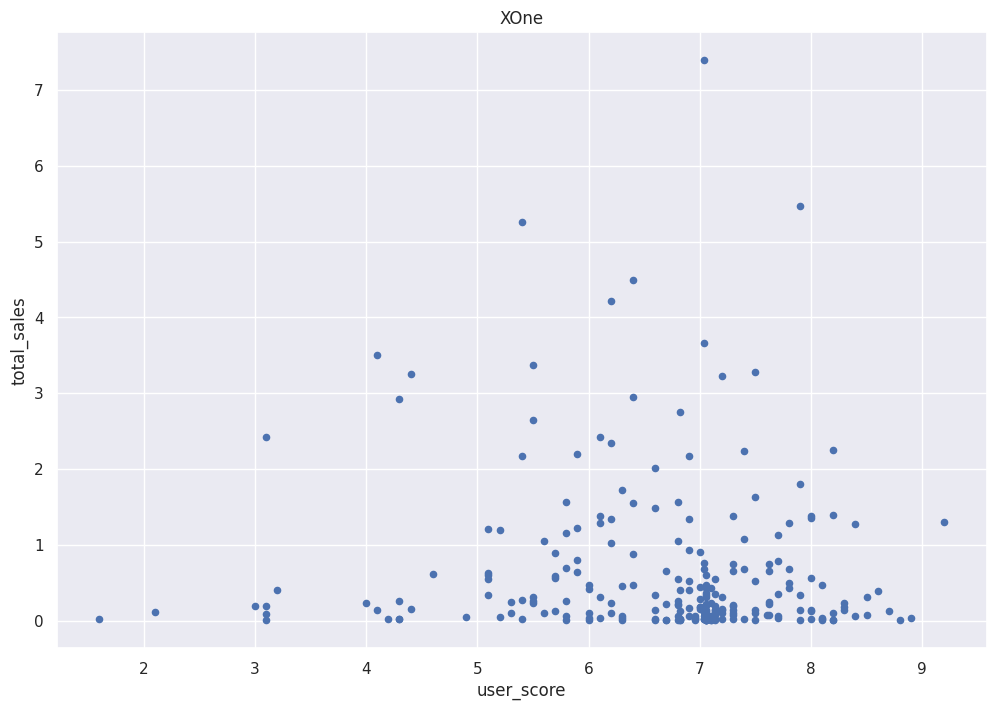

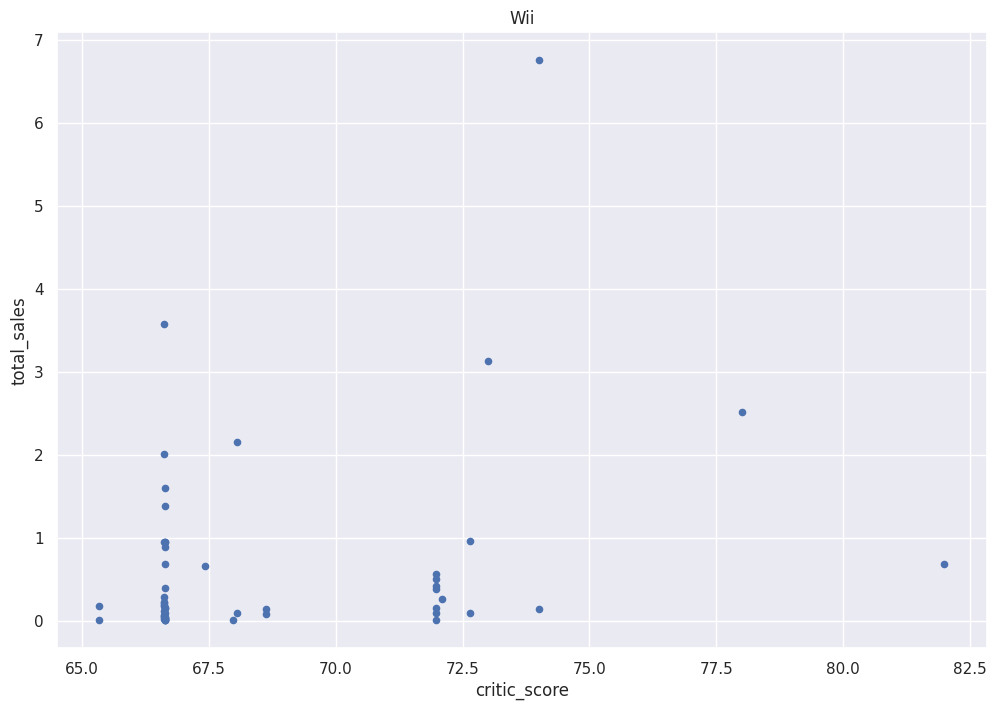

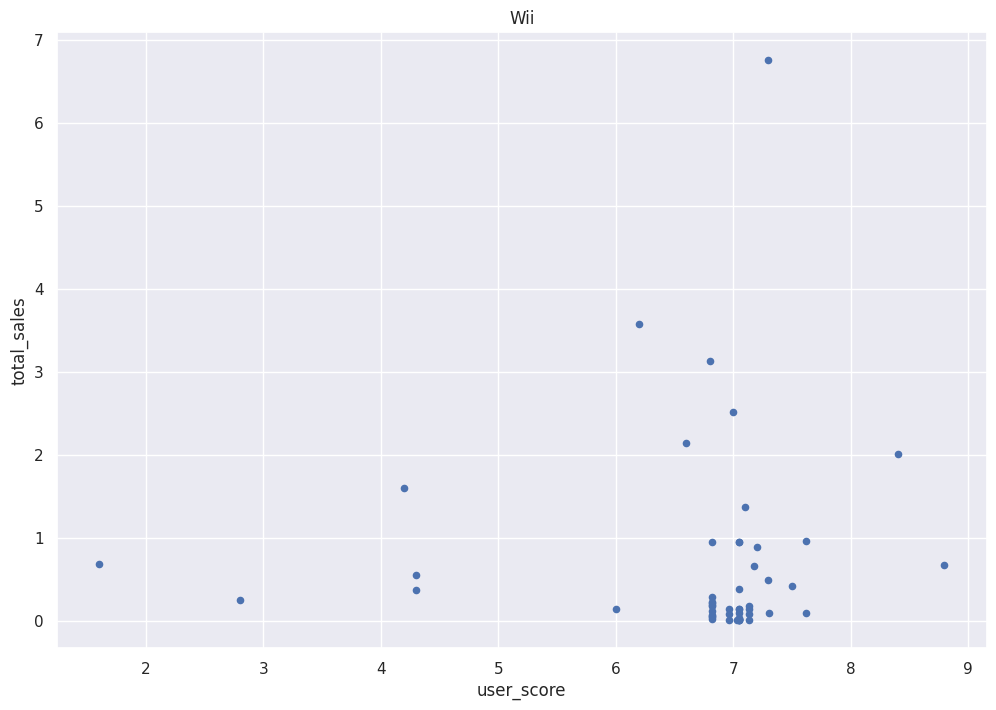

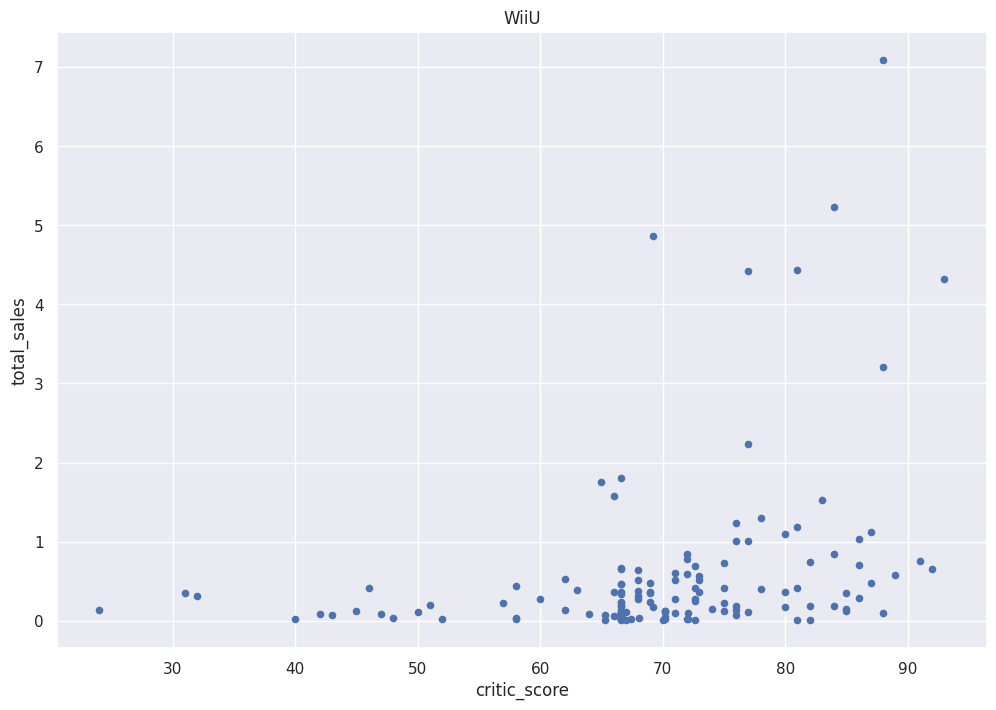

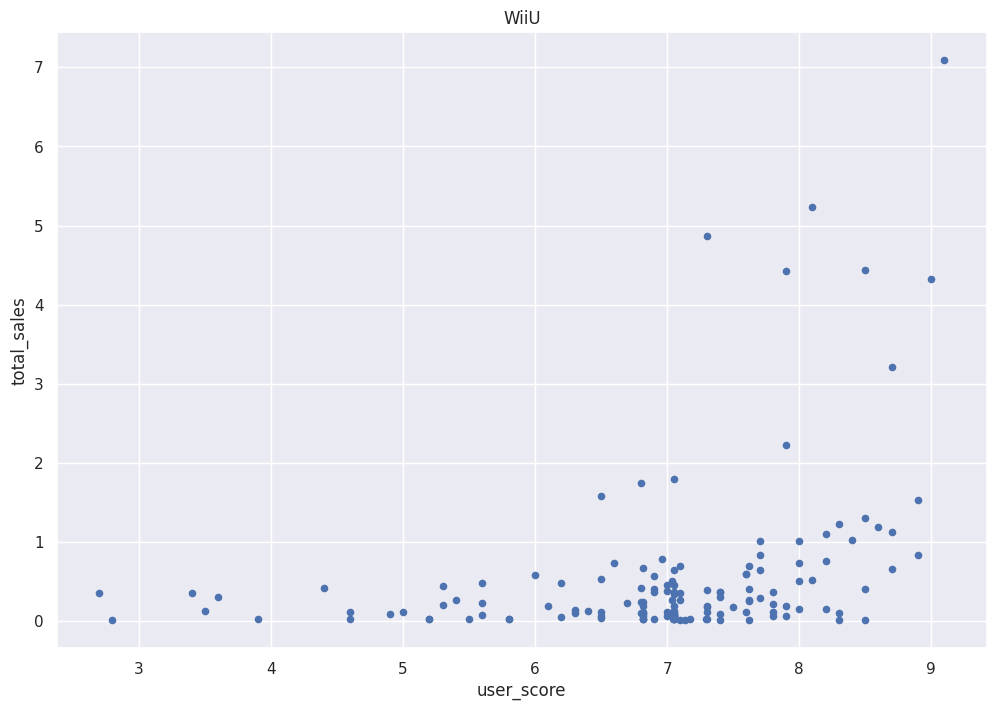

In [43]:
platforms = ['PS3', 'PS4', 'X360', 'XOne', 'Wii', 'WiiU']
for platform in platforms:
    correlation(platform)

* Correlaciones entre score de profesionales y usuarios respecto a las ventas totales:  
Se da el mismo fenómeno en las plataformas comparadas (PS3, PS4, X360, XOne, Wii); una correlación positiva -no tan fuerte- cercana al 40% para el puntaje de la crítica, pero cercana a 0 para el puntaje de los usuarios. Excepto para WiiU donde la correlación es cercana al 40% tanto para el puntaje de la crítica como para el de los usuarios, quizá debido a que la data para esta plataforma es menor.
El hecho de que el comportamiento sea similar en la mayoría de las plataformas quizá se relaciona con que un puntaje de los profesionales es considerado por quienes buscan constantemente videojuegos y están más insertos en este ámbito, mientras que el puntaje de los usuarios no es tan relevante debido a que puede ser algo más subjetivo, relacionado con el gusto personal de cada jugador.

In [44]:
# Agrupar los datos de venta de los últimos 5 años según género de videojuego
sales_genre = last_5_years.groupby(['genre', 'name'])['total_sales'].sum().reset_index()
sales_genre

,genre,name,total_sales
0,Action,.hack: Sekai no Mukou ni + Versus,0.03
1,Action,3rd Super Robot Wars Z: Tengoku-Hen,0.34
2,Action,7 Days to Die,0.19
3,Action,A Good Librarian Like a Good Shepherd: Library...,0.03
4,Action,AKB48+Me,0.11
...,...,...,...
1667,Strategy,Tropico 4: Modern Times,0.02
1668,Strategy,Ultraman Star Chronicles,0.02
1669,Strategy,War for the Overworld,0.01
1670,Strategy,XCOM 2,0.41


In [62]:
# Filtrar para observar los diagramas en donde se concentran mayormente las ventas, sin los outliers que no permiten visualizar bien la dispersión
sales_genre.query('1 < total_sales < 10', inplace=True)

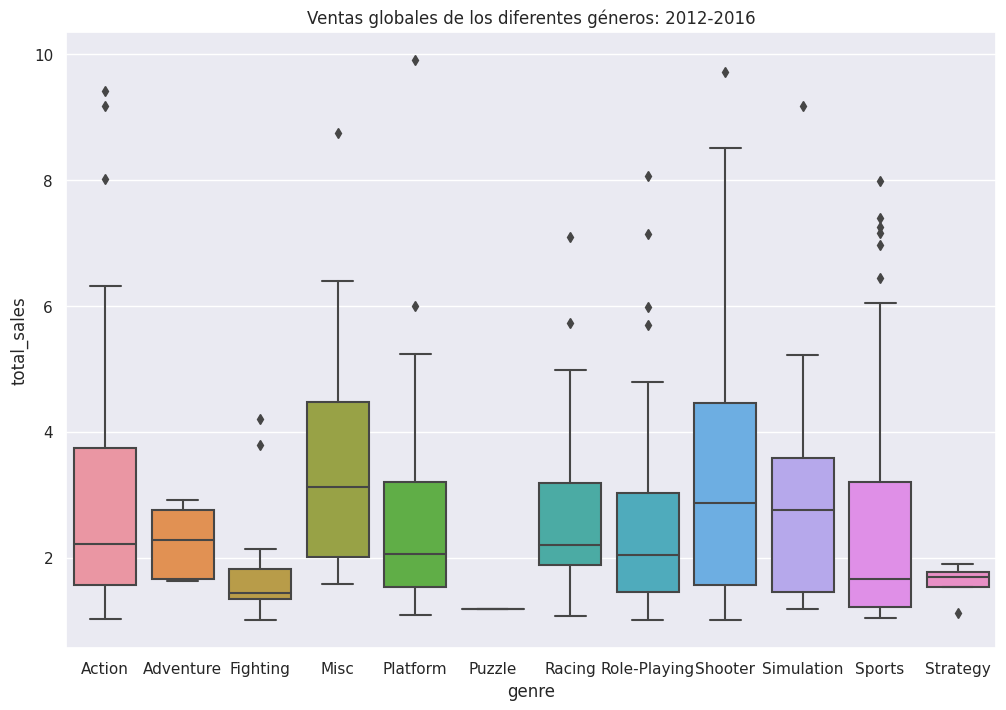

In [63]:
sns.boxplot(x='genre', y='total_sales', data=sales_genre).set_title('Ventas globales de los diferentes géneros: 2012-2016')
plt.show()

In [47]:
genre_top = last_5_years.groupby('genre')['total_sales'].sum().reset_index().sort_values(by= 'total_sales', ascending=False)
genre_top

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


* ¿Qué se puede decir de los géneros más rentables? ¿Se puede generalizar acerca de los géneros con ventas altas y bajas?
En general, varios géneros de videojuegos, como "action", "adventure", "platform", "racing" y "role-playing", mantienen un promedio de ventas totales relativamente cercano entre sí (aprox. 2 millones de dólares), pero no se podría generalizar respecto a sus ventas pues todos logran diferentes máximos y algunos géneros también acumulan varios valores atípicos, lo cual puede mejorar su rentabilidad logrando mayores ventas. Dentro de estos géneros, "shooter" es el que logra mayor dispersión entre sus datos de ventas y el que alcanza mayores valores lo cual podría indicar una tendencia a ser el género de juego más vendido en los últimos 5 años.

### Crear un perfil de usuario para cada región (NA, EU, JP)

##### Top 5 plataformas

In [48]:
# Determinar las 5 plataformas principales para NA.
na_platform = last_5_years.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_platform.head()

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


In [49]:
# Definir qué % del mercado llena cada una de las 5 plataformas principales en NA
na_platform['na_market_share'] = na_platform['na_sales']*100 / na_platform['na_sales'].sum()
na_platform.head()

,platform,na_sales,na_market_share
9,X360,140.05,23.698326
4,PS4,108.74,18.400257
3,PS3,103.38,17.493274
10,XOne,93.12,15.757145
0,3DS,55.31,9.359189


In [50]:
# Determinar las 5 plataformas principales para EU
eu_platform = last_5_years.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_platform.head()

,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


In [51]:
# Definir qué % del mercado llena cada una de las 5 plataformas principales en EU
eu_platform['eu_market_share'] = eu_platform['eu_sales']*100 / eu_platform['eu_sales'].sum()
eu_platform.head()

,platform,eu_sales,eu_market_share
4,PS4,141.09,27.838286
3,PS3,106.86,21.084409
9,X360,74.52,14.703445
10,XOne,51.59,10.179156
0,3DS,42.64,8.413243


In [52]:
# Determinar las 5 plataformas principales para JP
jp_platform = last_5_years.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_platform.head()

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


In [53]:
# Definir qué % del mercado llena cada una de las 5 plataformas principales en JP
jp_platform['jp_market_share'] = jp_platform['jp_sales']*100 / jp_platform['jp_sales'].sum()
jp_platform.head()

,platform,jp_sales,jp_market_share
0,3DS,87.79,45.586250
3,PS3,35.29,18.324852
6,PSV,21.04,10.925330
4,PS4,15.96,8.287465
8,WiiU,13.01,6.755634


* Describir las variaciones en el "market share" entre una región y otra:  
Entre EU y NA el % del mercado que ocupan las primeras plataformas no son tan diferentes; cerca de un 25% para la plataforma que ocupa el primer lugar en ventas y cerca de un 20% para la segunda. Mientras que en JP la plataforma que lidera las ventas llega al 45,5% donde se hace más notoria la diferencia respecto a las 4 restantes.
También, considerar que el mercado en EU y NA pueden considerarse similar respecto a las plataformas que más venden, las mismas 5 lideran en ambas regiones; X360, PS4, PS3, XOne y 3dS; cambiando sólo la que va en primer lugar; X360 para NA y PS4 para EU, mientras que para JP las 5 plataformas principales son diferentes: 3DS lidera seguido de PS3, PSV, PS4 y WiiU llegando a cubrir el 25% del mercado con estas últimas 3.  
Esto claramente marca una tendencia diferente si se piensa generar una campaña de marketing, pues una campaña similar podría funcionar tanto en NA como en EU pero habría que apuntar a algo diferente para JP.

##### Top 5 géneros

In [54]:
# Determinar los 5 principales géneros para NA
na_genre = last_5_years.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_genre.head()

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


In [55]:
# Determinar los 5 principales géneros para EU
eu_genre = last_5_years.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_genre.head()

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


In [56]:
# Determinar los 5 principales géneros para JP
jp_genre = last_5_years.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_genre.head()

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


* Diferencia entre los 5 principales géneros para las 3 regiones:  
Se da un comportamiento similar entre EU y NA; los 4 primeros géneros que lideran las ventas son "Action, Schooter, Sports y Role-Playing", cambiando sólo el último de los 5; que para NA es "Misc" y para EU es "Racing". Sin embargo, similar al suceso que ocurre con las plataformas entre las 3 regiones; JP difiere de las otras 2 totalmente; lidera "Role-Playing" y se observan otros géneros; "Simulation y Fighting". Lo anterior también refiere un comportamiento similar entre jugadores de estas regiones, por lo que habría que apuntar con campañas diferentes según la región en la que se quiera promocionar algún videojuego.
Sumado a esto, otro punto a destacar es que las ventas totales en EU y NA son más del doble que las de JP para los 5 primeros géneros.

##### Ventas según clasificaciones ESRB

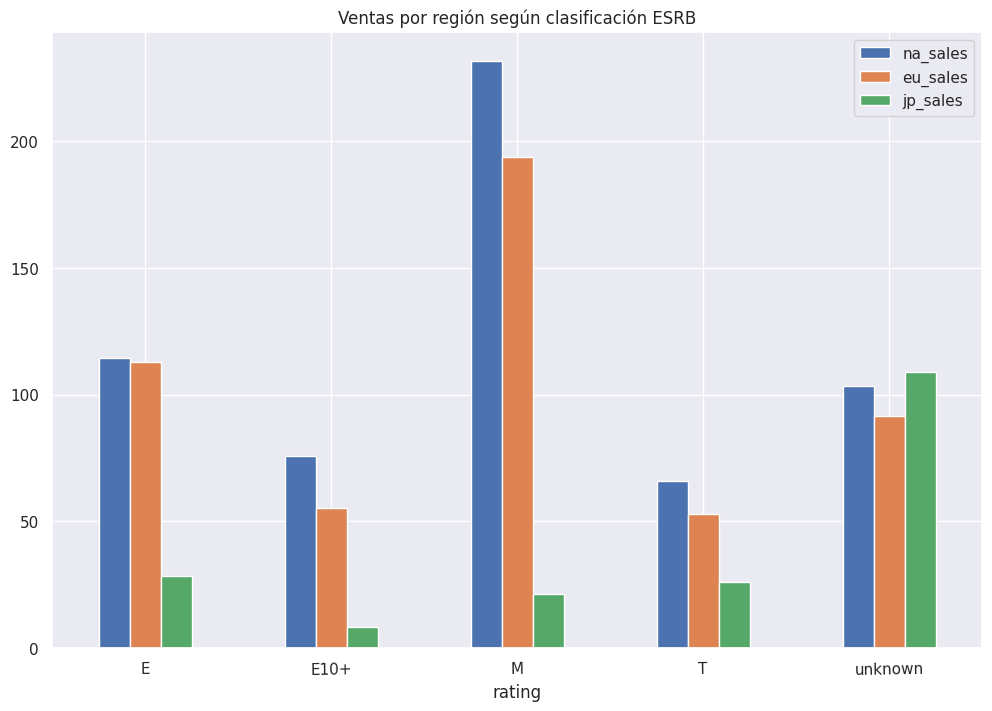

In [57]:
# Afectan las clasificaciones ESRB a las ventas de cada región?
rating_by_region = last_5_years.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
rating_by_region.plot(
    kind= 'bar',
    x= 'rating',
    title= 'Ventas por región según clasificación ESRB',
    rot= 1
)
plt.show()

* Cómo afectan las clasificaciones ESRB a las ventas de cada región?  
Japón -al igual que en las comparaciones previas en base a plataforma y género- muestra un comportamiento que difiere de Norteamérica y Europa; en base al 'rating' es la región con menores ventas en todas las clasificaciones, los juegos más vendidos son aquellos que no están dentro de una categoría. Para NA y EU la categoría con mayores ventas es 'M' (mayores de 17 años), un público más adulto. Seguido -en ambas regiones- de la categoría 'E' (apto para todo público).
De esto se puede desprender que el público al que se apunta es mayormente adulto, quizá en relación al poder adquisitivo, o también por algo relacionado a que a niños más pequeños se les incentive a buscar otro de tipo de entretenciones. En Japón debe influenciarse más por la cultura el hecho de que las ventas de videojuegos sean menores respecto a NA y EU que se han mostrado bien similares.

### Pruebas de Hipótesis

* Cómo se formularon las hipótesis nula y alternativa:

La Hipótesis nula surge a raíz de que no hay diferencia, de modo que para ambas pruebas de hipótesis H0 corresponde a que las plataformas comparadas tienen igual calificación promedio y la Hipótesis alternativa H1 al basarse en H0 indica que sí hay diferencias.

* Qué criterio se utilizó para probar las hipótesis y por qué:

Se está probando una hipótesis entre las medias de dos poblaciones diferentes por lo que se utiliza la prueba para 2 muestras ttest; un valor alpha del 5% como el nivel de probabilidad de rechazar "por error" una hipótesis que en realidad es verdadera.  

* Hipótesis: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [74]:
#H0: Para las plataformas XOne y PC, los puntajes promedio de los usuarios son los mismos
#H1: Para las plataformas XOne y PC, los puntajes promedio de los usuarios son diferentes

user_score_XOne = last_5_years.query('platform == "XOne"')['user_score']
user_score_PC = last_5_years.query('platform == "PC"')['user_score']
alpha = 0.05

# significancia test Levene: 0.05
st.levene(user_score_XOne, user_score_PC)

LeveneResult(statistic=9.314802899033468, pvalue=0.0023952381042608817)

Del test de Levene se obtuvo valor p= 0.0023 de modo tal que el parámetro *equal var* para el ttest sera =False

In [78]:
results = st.ttest_ind(user_score_XOne, user_score_PC, equal_var=False)
print(results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula; los puntajes promedio de los usuarios para XOne y PC son diferentes')
else:
    print('No podemos rechazar la hipótesis nula; los puntajes promedios de los usuarios para XOne y PC son los mismos')

0.3358176607162223
No podemos rechazar la hipótesis nula; los puntajes promedios de los usuarios para XOne y PC son los mismos


* Hipótesis: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [76]:
#H0: Para los géneros Acción y Deportes, los puntajes promedio de los usuarios son los mismos
#H1: Para los géneros Acción y Deportes, los puntajes promedio de los usuarios son diferentes

user_score_action = last_5_years.query('genre == "Action"')['user_score']
user_score_sports = last_5_years.query('genre == "Sports"')['user_score']
alpha = 0.05

# significancia test de Levene: 0.05
st.levene(user_score_action, user_score_sports)

LeveneResult(statistic=126.6014269113794, pvalue=4.332002241632886e-28)

Del test de Levene se obtuvo valor p= 4.332 de modo tal que el parámetro *equal var* para el ttest sera =True

In [77]:
results = st.ttest_ind(user_score_action, user_score_sports)
print(results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula; los puntajes promedio de los usuarios para "Acción" y "Deporte" son diferentes')
else:
    print('No podemos rechazar la hipótesis nula; los puntajes promedios de los usuarios para "Acción" y "Deporte" son los mismos')

1.2381219189340822e-39
Rechazamos la hipótesis nula; los puntajes promedio de los usuarios para "Acción" y "Deporte" son diferentes


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_one_data['user_score'], pc_data['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes!
</div>

### Conclusión

Si bien considerar el comportamiento histórico de una data ayuda a comprender cómo se puden ir dando las ventas a través de los años, para considerar ventas de un año siguiente es importante también contemplar con más detalle los datos más recientes; en este caso de las plataformas más actuales a las que se puede apuntar con campañas publicitarias que promuevan sus ventas.  
Tras el análisis de la distribución de ventas de las diferentes plataformas, se buscó las que lograron mayores ventas totales; siendo PS3 y X360 dentro de las principales hasta que surgieron sus versiones más actuales: PS4 y XOne, las cuales comenzaron a aumentar sus ventas a medida que decrecen las anteriores. Entendiendo que este comportamiento suele presentarse cada vez que se lanza una nueva versión de alguna plataforma, estas 2 apuntan a ser una buena opción a promover; siendo las más recientes y que probablemente aún no logran su peak; como objetivo para impulsar sus ventas el año próximo; 2017.  
Con el fin de entender factores influyentes en la generación de una campaña publicitaria adecuada, se buscó el comportamiento de los usuarios en las 3 regiones de la data; NA, EU y JP; observando que EU y NA muestran un comportamiento bastante similar para diferentes ámbitos; plataformas, género de videojuego y rating, a diferencia de JP que se aleja dando a entender que los usuarios de esta región tienen preferencias y un comportamiento diferente. Estos puntos son relevantes a la hora de planificar una campaña de marketing; que debe ser adecuada al público objetivo al cual se le pretende vender cierto producto.  
Así; considerando los datos y el análisis previo, se podría desprender realizar una campaña que puede funcionar tanto para NA como para EU; enfocada en la promoción de PS4 y XOne como plataformas de videojuegos, y promoviendo videojuegos que se ejecuten en estas: principalmente de los géneros "action", "shooter" y "sports". Mientras que para JP la plataforma líder a la cual habría que apuntar es 3DS y videojuegos de los géneros "role-playing" y "action". 


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>